In [1]:
cd

/Users/shashanksharma


/Users/shashanksharma/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/shashanksharma/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:428: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import phyLattice.QED_package.action as fm

In [3]:
"""
psi = torch.randn((L, L, Lt, 2), dtype=torch.float64)  # Real and imaginary parts
p_psi = torch.randn((L, L, Lt, 2), dtype=torch.float64)
chi = psi[..., 0] + 1j * psi[..., 1]  # Combine real and imaginary parts
chi_bar = chi.conj()
p_chi = p_psi[..., 0] + 1j * p_psi[..., 1]  # Combine real and imaginary parts
p_chi_bar = p_chi.conj()
# Create gauge fields (complex numbers on the links) initialized as U(1) links
U = torch.exp(1j * 2 * torch.pi * torch.rand(L, L, Lt, 3, dtype=torch.float64))
P = torch.exp(1j * 2 * torch.pi * torch.rand(L, L, Lt, 3, dtype=torch.float64))
"""

'\npsi = torch.randn((L, L, Lt, 2), dtype=torch.float64)  # Real and imaginary parts\np_psi = torch.randn((L, L, Lt, 2), dtype=torch.float64)\nchi = psi[..., 0] + 1j * psi[..., 1]  # Combine real and imaginary parts\nchi_bar = chi.conj()\np_chi = p_psi[..., 0] + 1j * p_psi[..., 1]  # Combine real and imaginary parts\np_chi_bar = p_chi.conj()\n# Create gauge fields (complex numbers on the links) initialized as U(1) links\nU = torch.exp(1j * 2 * torch.pi * torch.rand(L, L, Lt, 3, dtype=torch.float64))\nP = torch.exp(1j * 2 * torch.pi * torch.rand(L, L, Lt, 3, dtype=torch.float64))\n'

In [4]:
from phyLattice.QED_package import wilson_gauge_action

In [5]:
from phyLattice.QED_package.HMC_update import hmc_update, init_fields

In [6]:
Lt = 64
action = []
N = 100
for n in range(N):
    if n%(N-1) == 0:
         print(n)
    #op, deri = fm.staggered_dirac_operator(chi, U, L, Lt, 1, 3)
    #action.append(torch.sum(op))
    #action.append(0.256*torch.sum(chi_bar*chi).real)
    #action.append(((torch.sum(p_chi * (p_chi).conj() + p_chi_bar * (p_chi_bar).conj())).real + fm.staggered_fermion(chi, chi_bar, U, 0.256, a, L, Lt, 3) + wilson_gauge_action.gauge_action(U, 0.01, 3)))
    hmc_update(chi, chi_bar, U, L, Lt, 1, 0.01, 0.256, 0.005/(n+1), 0.1/(n+1), 3)
    action.append(fm.staggered_fermion(chi, chi_bar, U, 0.256, 1, L, Lt, 3) + wilson_gauge_action.gauge_action(U, 0.01, 3))


0


NameError: name 'chi' is not defined

In [7]:
from torch import randn, float64, exp, sum, linspace, abs
import matplotlib.pyplot as plt

In [8]:
def weight (chi, chi_bar, U, m, a, L, Lt):
    return exp(1170-((fm.staggered_fermion(chi, chi_bar, U, m, a, L, Lt, 3)+wilson_gauge_action.gauge_action(U, 0.01, 3)/1)).real)

In [9]:
import numpy as np

In [10]:
dimension = 3
time = 64
L = 8
Lt = 8
asd = []

psi = randn((L, L, Lt, 2), dtype=float64)  # Real and imaginary parts
chi = psi[..., 0] + 1j * psi[..., 1]  # Combine real and imaginary parts
chi_bar = chi.conj()
chi = chi/abs(chi)
chi_bar = chi_bar/abs(chi_bar)
         # Create gauge fields (complex numbers on the links) initialized as U(1) links
U = randn(L, L, Lt, dimension, dtype=float64) + 1j*randn(L, L, Lt, dimension, dtype=float64)
U = U/abs(U)
weight_c = 0
w = 0
A = []
#asd = 0
n_up = 200
for n in range(n_up):
    hmc_update(chi, chi_bar, U, L, Lt, 1, 0.01, 0.256, 0.005/(n+1), 0.1/(n+1), 3)
    '''
    chichibar = []
    for t in range(32):
        chi = chi/abs(chi)
        chi_bar = chi_bar/abs(chi_bar)
        chichibar.append(mean(chi[:,:,32+t] * chi_bar[:,:,32-t]).real)
    weight_c = np.zeros_like(chichibar)
    weight_c += np.array(chichibar) * np.array(weight(chi, chi_bar, U, 0.256, 1, 8, 64))
    w += (weight(chi, chi_bar, U, 0.256, 1, 8, 64))
    #chi = chi/abs(chi)
    #chi_bar = chi_bar/abs(chi_bar)

    
    #print(weight_c/w)
    '''
    A.append(fm.staggered_fermion(chi, chi_bar, U, 0.256, 1, L, Lt, 3)+wilson_gauge_action.gauge_action(U, 0.01, 3))
#asd = (weight_c/w)


/Users/shashanksharma/Library/Python/3.9/lib/python/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [11]:
chi.shape

torch.Size([8, 8, 8])

In [12]:

asdf = []
for Lt in range(50):
        chi = chi/abs(chi)
        chi_bar = chi_bar/abs(chi_bar)
        #weight_c += (sum(chi[:,:,Lt-1] * (chi_bar[:,:,0])).real) * weight (chi, chi_bar, U, 0.256, 1, L, Lt)
        #w += weight (chi, chi_bar, U, 0.256, 1, L, Lt)
        asdf.append(mean(chi[:,:,50+Lt] * chi_bar[:,:,50-Lt]).real)


NameError: name 'mean' is not defined

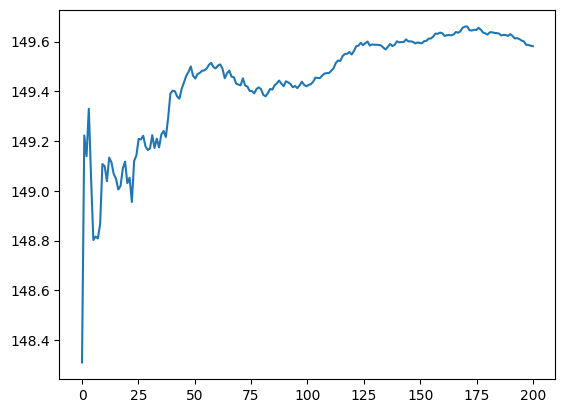

In [13]:
plt.plot(linspace(0,n_up,n_up),A)

In [14]:
import numpy as np

ValueError: x and y must have same first dimension, but have shapes (49,) and (0,)

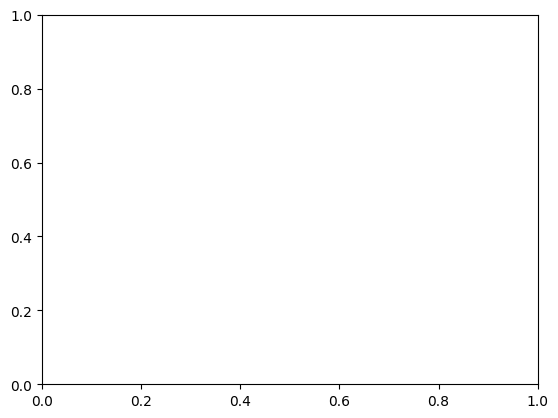

In [15]:
plt.plot(linspace(0, 49, 49),(np.abs(np.array(asdf)**1))[1:], marker='o')

In [939]:
len(asdf)

50

Slope: -1.4742197930304046e-05, Intercept: 0.28921687911994004


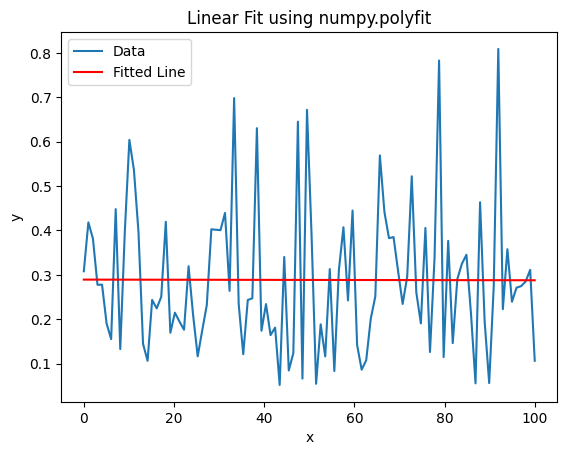

In [940]:
x_data = np.linspace(0,100,100)
y_data = correlator# np.log(np.abs(np.array(asdf)**1)[1:])
slope, intercept = np.polyfit(x_data, y_data, 1)
print(f"Slope: {slope}, Intercept: {intercept}")

# Plot data and fitted line
plt.plot(x_data, y_data, label='Data')
plt.plot(x_data, slope * x_data + intercept, color='red', label='Fitted Line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit using numpy.polyfit')
plt.show()

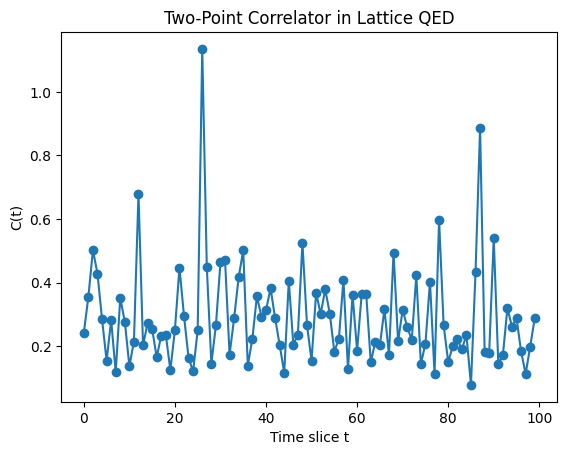

In [945]:
from scipy.sparse.linalg import cg
from torch import mean, tensor
L, Lt = 8, 100
# Invert Dirac operator to get the propagator
D,_ = fm.staggered_dirac_operator(chi, U, L, Lt, 0.256, 3)
propagator = fm.conjugate_gradient(D.conj()*D, D.conj()*chi, maxiter=1000)

# Reshape propagator for lattice coordinates
propagator = tensor(propagator)

# Compute the correlator as a spatial average

# Calculate and print the correlator
correlator = abs(mean(mean(propagator, axis = 0 ), axis = 0))
#print("Correlator:", correlator)

# Optionally, plot the correlator
import matplotlib.pyplot as plt
plt.plot(range(Lt), correlator, marker='o')
plt.xlabel('Time slice t')
plt.ylabel('C(t)')
plt.title('Two-Point Correlator in Lattice QED')
plt.show()


In [946]:
asd

[]

In [947]:
from QED_package.action import QED_action
QED_action(chi, chi_bar, U, 0.01, 0.256, 1, L, Lt, 3)

tensor(1829.1719, dtype=torch.float64)